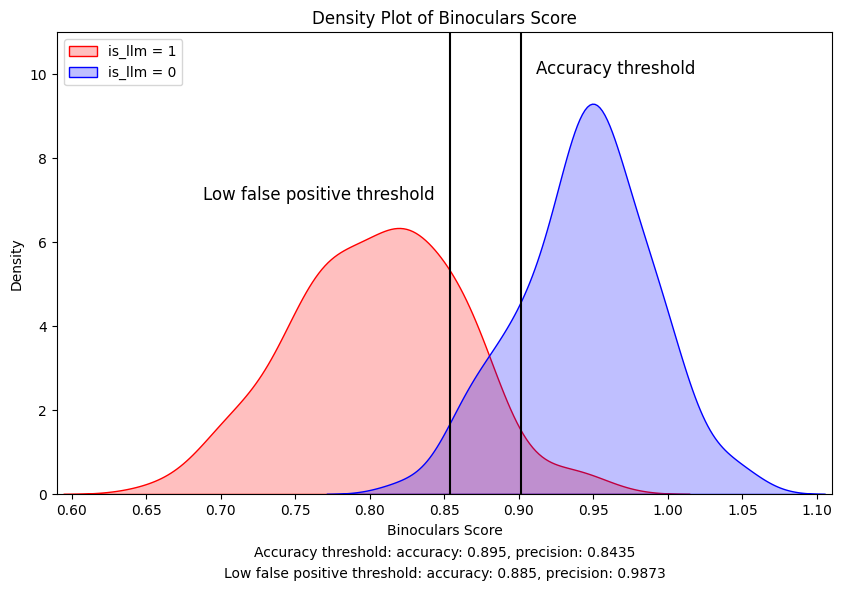

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score, precision_score

BINOCULARS_ACCURACY_THRESHOLD = 0.9015310749276843  # optimized for f1-score
BINOCULARS_FPR_THRESHOLD = 0.8536432310785527 

# Load JSON data from an external file
file_path = '../../data/binoculars/bino-mapped.json'  # Replace this with the path to your JSON file
with open(file_path, 'r') as file:
    json_data = json.load(file)

# Load JSON data into a pandas DataFrame
df = pd.DataFrame(json_data)

# Create density plots
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['is_llm'] == 1]['binoculars_score'], color='red', label='is_llm = 1', fill=True, common_norm=True, common_grid=True)
sns.kdeplot(df[df['is_llm'] == 0]['binoculars_score'], color='blue', label='is_llm = 0', fill=True, common_norm=True, common_grid=True)

points = [BINOCULARS_ACCURACY_THRESHOLD, BINOCULARS_FPR_THRESHOLD]  # The specific points on the x-axis where you want to add the labels
labels = ['Accuracy threshold', 'Low false positive threshold']  # Corresponding labels
y_values = [10, 7]



def get_pred(row, threshold = BINOCULARS_ACCURACY_THRESHOLD):
    return 1 if row['binoculars_score'] < threshold else 0
    

df['is_pred_correct'] = df.apply(get_pred, axis=1)
df['is_pred_correct_low_fpr'] = df.apply(lambda row: get_pred(row, threshold=BINOCULARS_FPR_THRESHOLD), axis=1)
acc = accuracy_score(df['is_llm'], df['is_pred_correct'])
f1 = precision_score(df['is_llm'], df['is_pred_correct'])
low_fpr_acc = accuracy_score(df['is_llm'], df['is_pred_correct_low_fpr'])
low_fpr_f1 = precision_score(df['is_llm'], df['is_pred_correct_low_fpr'])

acc_text = f'Accuracy threshold: accuracy: {round(acc,4)}, precision: {round(f1,4)}'
low_fpr_text = f'Low false positive threshold: accuracy: {round(low_fpr_acc,4)}, precision: {round(low_fpr_f1,4)}'

for x_point, label, y_value in zip(points, labels, y_values):
    ha = 'left' if x_point == BINOCULARS_ACCURACY_THRESHOLD else 'right'
    offset = 0.01 if x_point == BINOCULARS_ACCURACY_THRESHOLD else -0.01
    
    plt.text(x_point + offset, y_value, label, fontsize=12, ha=ha, color='black')
    
    plt.axvline(x=x_point, color='black')
    
# Customize the plot
plt.xlim(0.59, 1.11)
plt.ylim(0, 11)
plt.text(0.85,-1.5,acc_text, ha='center')
plt.text(0.85,-2,low_fpr_text, ha='center')
plt.xticks(np.arange(0.6, 1.15, 0.05).tolist())

plt.xlabel('Binoculars Score')
plt.ylabel('Density')
plt.title('Density Plot of Binoculars Score')
plt.legend(loc='upper left')
plt.show()

In [34]:
def calculate_accuracy(y_true, y_hat):
    correct_pred = torch.eq(torch.sigmoid(y_hat).round(), y_true).sum().item()
    return (correct_pred / len(y_hat)) * 100

def calculate_f1(y_true, y_hat):
    y_pred = torch.sigmoid(y_hat).round()
    return f1_score(y_true, y_pred)

Results for default threshold: accuracy: 0.895, f1: 0.9023
Results for low false positive threshold: accuracy: 0.885, f1: 0.8715
